# ATENÇÃO

Para fins didáticos, a primeira versão do estudo foi feita sem pré-processamento, para comparar com versão posterior utilizando pipeline com pré-processamento, PCA e K-Means.

Assim, a versão deste notebook não deve ser considerada para análises mais profundas.

In [1]:
import pandas as pd

DADOS = "../dados/Mall_Customers_no_CustomerID_clustered.csv"

df_clustered = pd.read_csv(DADOS)

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,5
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5


In [2]:
import joblib

kmeans = joblib.load("../modelos/kmeans.pkl")

kmeans.labels_

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 0, 3,
       5, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [3]:
kmeans.cluster_centers_

array([[56.15555556, 53.37777778, 49.08888889],
       [41.68571429, 88.22857143, 17.28571429],
       [25.27272727, 25.72727273, 79.36363636],
       [27.        , 56.65789474, 49.13157895],
       [32.69230769, 86.53846154, 82.12820513],
       [44.14285714, 25.14285714, 19.52380952]])

In [4]:
df_clustered.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')

In [5]:
# !pip install ipympl

In [6]:
# %matplotlib ipympl  # descomente para interatividade
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualizar_clusters(
    dataframe,
    colunas,
    quantidade_cores,
    mostrar_centroids=True, 
    mostrar_pontos=False
):

    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection="3d")
    
    cores = plt.cm.tab10.colors[:quantidade_cores]
    cores = ListedColormap(cores)
    
    centroids = kmeans.cluster_centers_

    x = dataframe[colunas[0]]
    y = dataframe[colunas[1]]
    z = dataframe[colunas[2]]
    
    ligar_centroids = mostrar_centroids
    ligar_pontos = mostrar_pontos
    
    for i, centroid in enumerate(centroids):
        if ligar_centroids: 
            ax.scatter(*centroid, s=500, alpha=0.5)
            ax.text(*centroid, f"{i}", fontsize=20, horizontalalignment="center", verticalalignment="center")
    
        if ligar_pontos:
            s = ax.scatter(x, y, z, c=dataframe["cluster"], cmap=cores)
            ax.legend(*s.legend_elements(), bbox_to_anchor=(1.3, 1))
    
    ax.set_xlabel(colunas[0])
    ax.set_ylabel(colunas[1])
    ax.set_zlabel(colunas[2])
    ax.set_title("Clusters")
    
    plt.show()

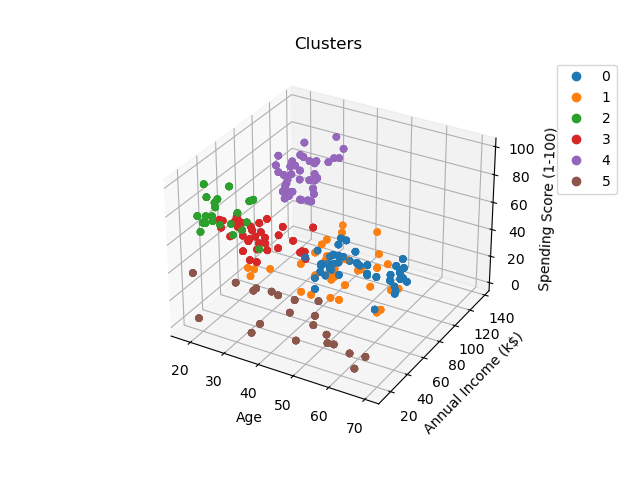

In [7]:
visualizar_clusters(df_clustered, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 6, mostrar_pontos=True, mostrar_centroids=False)